Import necessary libraries

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, GaussianNoise
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

Load and preprocess the MNIST dataset

In [2]:
(x_train, _), (x_test, _) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize images to [0,1]
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Define parameters

In [3]:
input_dim = 28 * 28  # 784 pixels
encoding_dim = 128   # Latent space size

Definition of a Denoising Autoencoder (DAE):

    A denoising autoencoder learns to reconstruct a clean version of an input that has been corrupted by noise.
    Instead of directly learning X -> X', it learns to map a noisy version X_noisy -> X_clean.
    This forces the encoder to extract robust features that ignore noise.

Definition of Feature Map:

    Feature maps represent the activations of neurons in a hidden layer of a neural network.
    In DAEs, feature maps capture significant patterns and features from the input data.
    Higher noise levels encourage DAEs to learn broader features like pen strokes.

In [4]:
def create_denoising_autoencoder(noise_factor):
    """Creates a denoising autoencoder model with a given noise factor."""
    input_layer = Input(shape=(input_dim,))
    noisy_input = GaussianNoise(noise_factor)(input_layer)  # Adds Gaussian noise to input
    encoded = Dense(encoding_dim, activation='relu')(noisy_input)  # Encoder
    decoded = Dense(input_dim, activation='sigmoid')(encoded)  # Decoder

    model = Model(input_layer, decoded)
    model.compile(optimizer='adam', loss='mse')
    return model

Create autoencoders with different noise levels

In [5]:
noise_levels = [0.0, 0.25, 0.5]
models = {nf: create_denoising_autoencoder(nf) for nf in noise_levels}

Train each model

In [6]:
for noise_factor, model in models.items():
    print(f"Training Denoising Autoencoder with noise factor {noise_factor}")
    model.fit(x_train, x_train, epochs=10, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

Training Denoising Autoencoder with noise factor 0.0
Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - loss: 0.0849 - val_loss: 0.0246
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - loss: 0.0214 - val_loss: 0.0136
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - loss: 0.0124 - val_loss: 0.0090
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - loss: 0.0084 - val_loss: 0.0065
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0063 - val_loss: 0.0051
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0051 - val_loss: 0.0043
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - loss: 0.0043 - val_loss: 0.0037
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0037 - val_loss: 0.0033
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0034 - val_loss: 0.0030
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - loss: 0.0031 - val_loss: 0.0028
Training Denoising Autoencoder with noise factor 0.25
Epoch 1/10
235/235 ━━━

Function to visualize feature maps

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


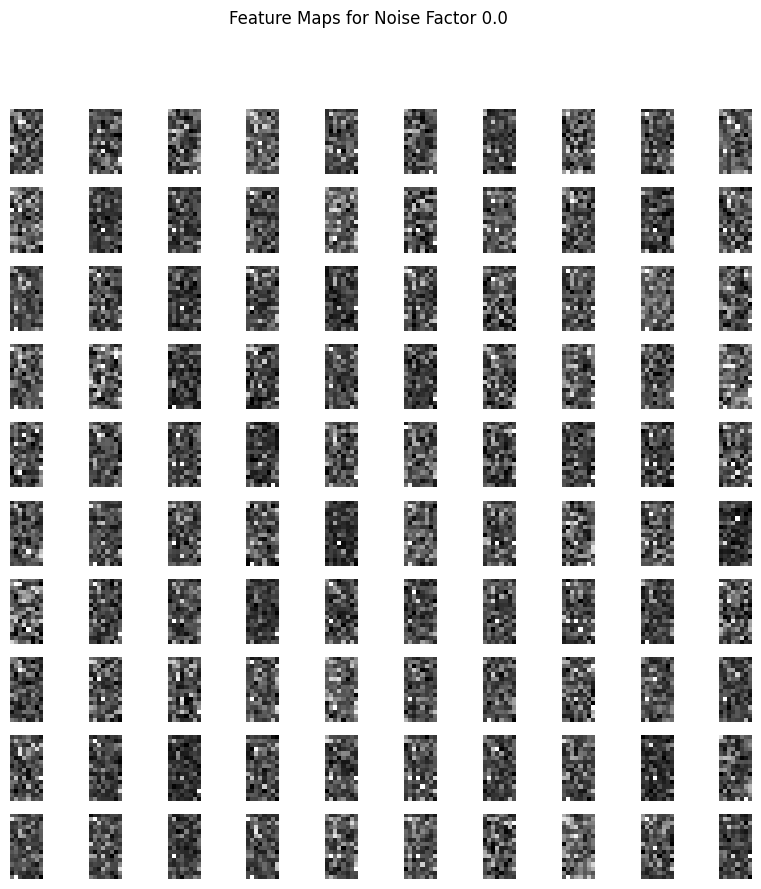

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


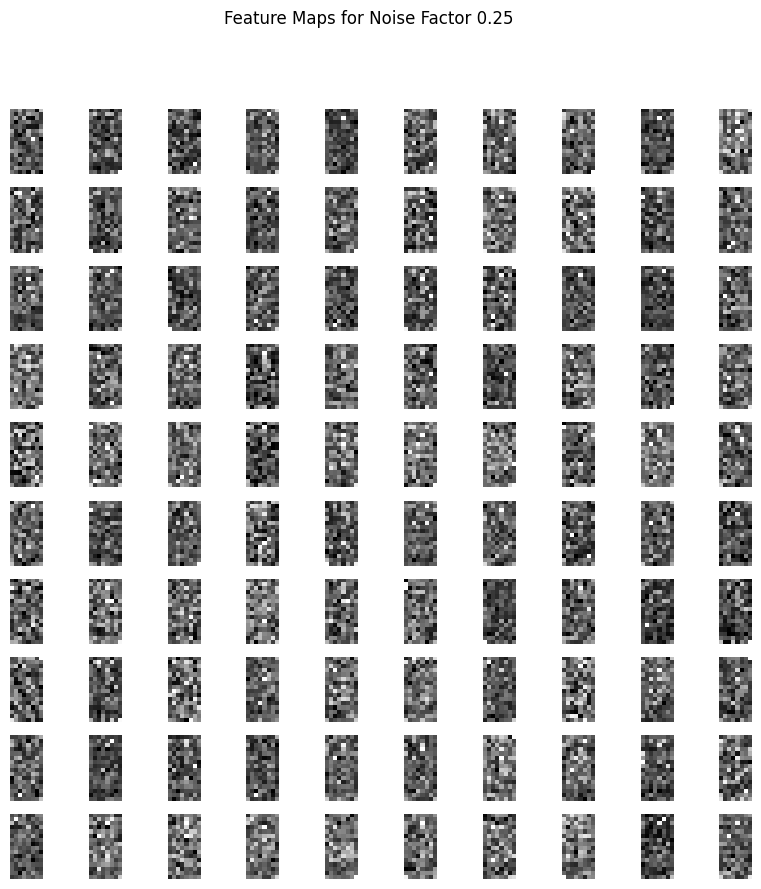

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


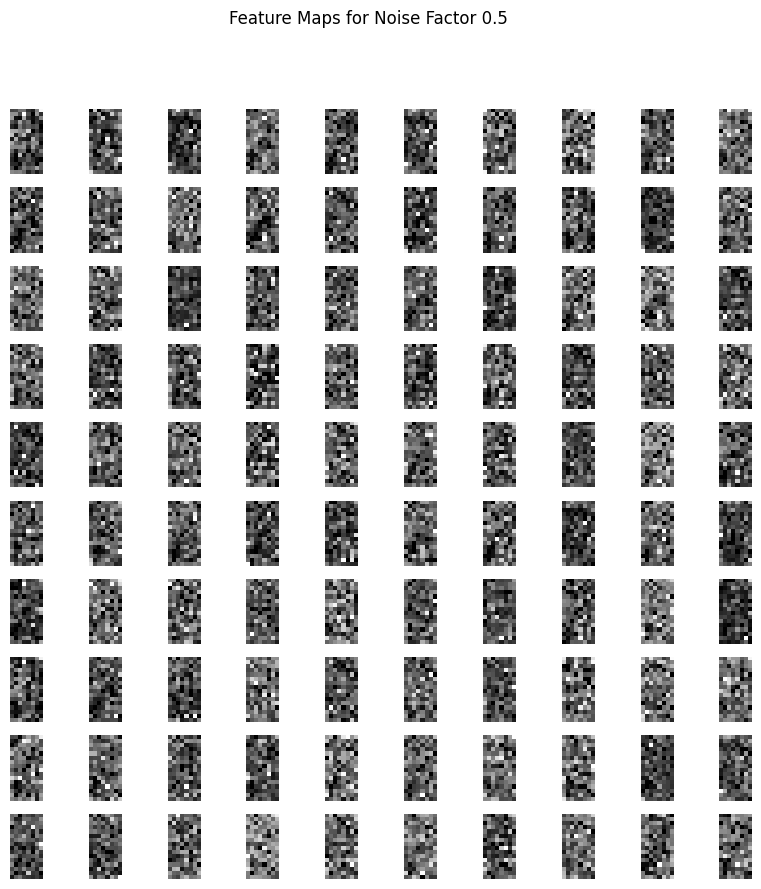

In [7]:
def visualize_feature_maps(model, title):
    encoder = Model(model.input, model.layers[2].output)  # Extract encoder
    encoded_imgs = encoder.predict(x_test[:100])  # Get feature maps for 100 images

    fig, axes = plt.subplots(10, 10, figsize=(10, 10))
    for i, ax in enumerate(axes.flat):
        ax.imshow(encoded_imgs[i].reshape(16, 8), cmap='gray')  # Reshape latent space to visualize
        ax.axis('off')
    plt.suptitle(title)
    plt.show()

# Visualize feature maps for different noise levels
for noise_factor, model in models.items():
    visualize_feature_maps(model, f'Feature Maps for Noise Factor {noise_factor}')

# Summary:

    1. Vanilla AE (0 noise) learns weak feature representations.
    2. DAEs with noise factors 0.25 and 0.5 learn more meaningful stroke-like patterns.
    3. As noise increases, the filters become wider to capture more general stroke features.